In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [2]:
def sigmoid(x, w):
    return 1/(1+np.exp(-(np.dot(x, w))))

def generate_data(m):
    # returns the true w as well as X, Y data
    dimension = 10

    # generate weight vector
    w = np.random.randn(dimension)
    w = w / np.linalg.norm(w)

    # generate training set
    X = np.random.randn(m, dimension)
    
    # label creation
    probs = sigmoid(X, w)
    y = np.random.binomial(1, probs)

    return w, X, y

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [3]:
from sklearn.linear_model import LogisticRegression

def train_logistic_regression(x, y):
    lr = LogisticRegression(max_iter=1000)
    lr.fit(x, y)
    return lr.coef_[0]


## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [4]:
def gradient_descent_with_square_loss(x, y, iterations, step_size):
    w = np.zeros(x.shape[1])
    for _ in range(iterations):
        s = sigmoid(x, w)
        grad = np.dot((s - y) * s * (1-s), x)/len(x)
        w -= step_size * grad
    return w

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [5]:
def sgd_with_square_loss(x, y, index, iterations, step_size):
    w = np.zeros(x.shape[1])
    for _ in range(iterations):
        s = sigmoid(w, x[index])
        grad = np.dot((s - y[index]) * s * (1-s), x[index])
        w -= step_size * grad
    return w

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

For size 50, logistic regression took 0.08945393562316895
For size 50, Gradient Descent took 0.10342764854431152
For size 50, SGD took 0.05529284477233887
For size 100, logistic regression took 0.012586593627929688
For size 100, Gradient Descent took 0.1079549789428711
For size 100, SGD took 0.04668879508972168
For size 150, logistic regression took 0.011583089828491211
For size 150, Gradient Descent took 0.10998368263244629
For size 150, SGD took 0.04667496681213379
For size 200, logistic regression took 0.011071920394897461
For size 200, Gradient Descent took 0.12254571914672852
For size 200, SGD took 0.04671216011047363
For size 250, logistic regression took 0.01155996322631836
For size 250, Gradient Descent took 0.12769007682800293
For size 250, SGD took 0.04677319526672363


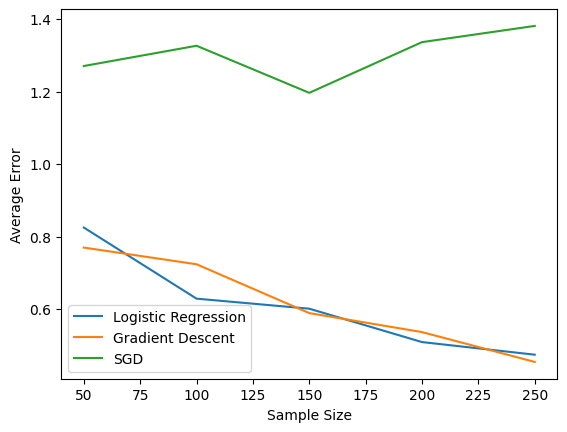

In [6]:
import time
from sklearn.model_selection import train_test_split

m_sizes = [50, 100, 150, 200, 250]
num_trials = 10
iterations = 1000
step_size = 0.01

errors_lr = []
errors_gd = []
errors_sgd = []

times_lr = []
times_gd = []
times_sgd = []

for m in m_sizes:
    err_lr, err_gd, err_sgd = 0, 0, 0
    
    # train logistic regression
    lr_start_time = time.time()
    for _ in range(num_trials):
        w_true, X, y = generate_data(m)
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        w_model = train_logistic_regression(X_train, y_train)
        err_lr += np.linalg.norm(w_true - (w_model / np.linalg.norm(w_model)))
    times_lr.append(time.time() - lr_start_time)
    errors_lr.append(err_lr/num_trials)

    # gradient descent
    gd_start_time = time.time()
    for _ in range(num_trials):
        w_true, X, y = generate_data(m)
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        w_model = gradient_descent_with_square_loss(X_train, y_train, iterations, step_size)
        err_gd += np.linalg.norm(w_true - (w_model / np.linalg.norm(w_model)))
    times_gd.append(time.time() - gd_start_time)
    errors_gd.append(err_gd/num_trials)

    # SGD
    sgd_start_time = time.time()
    for _ in range(num_trials):
        w_true, X, y = generate_data(m)
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        index = np.random.randint(X.shape[1])
        w_model = sgd_with_square_loss(X_train, y_train, index, iterations, step_size)
        err_sgd += np.linalg.norm(w_true - (w_model / np.linalg.norm(w_model)))
    times_sgd.append(time.time() - sgd_start_time)
    errors_sgd.append(err_sgd/num_trials)

for i in range(0, len(m_sizes)):
    print(f"For size {m_sizes[i]}, logistic regression took {times_lr[i]}")
    print(f"For size {m_sizes[i]}, Gradient Descent took {times_gd[i]}")
    print(f"For size {m_sizes[i]}, SGD took {times_sgd[i]}")

# plotting the results
plt.plot(m_sizes, errors_lr, label="Logistic Regression")
plt.plot(m_sizes, errors_gd, label="Gradient Descent")
plt.plot(m_sizes, errors_sgd, label="SGD")
plt.xlabel("Sample Size")
plt.ylabel("Average Error")
plt.legend()
plt.show()

# Problem 2

In [7]:
from sklearn import datasets

In [8]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

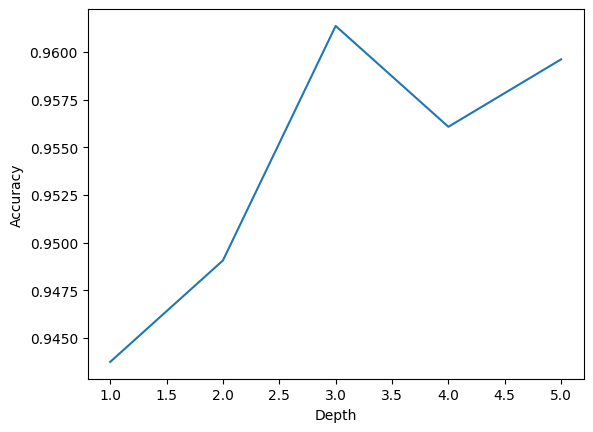

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

depths = [1, 2, 3, 4, 5]
accuracies = []

for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=101)
    model = AdaBoostClassifier(estimator=classifier, random_state=101, n_estimators=10, learning_rate=1)
    kf = KFold(n_splits=10)
    accuracies.append(np.mean(cross_val_score(model, cancer.data, cancer.target, cv=kf)))

plt.plot(depths, accuracies)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()